Ch2. 시계열 데이터  
Section1. 시계열 데이터은 아래의 3가지 Components로 구분됨.
1. 추세 (Trends)
2. 계절성 (Seasonality)
3. 잔차 (Residual)


1. 추세 (Trends) 데이터

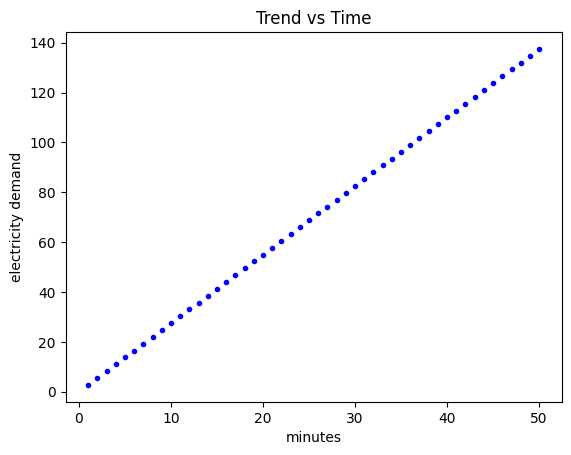

In [9]:
import sys
import statsmodels as ss
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
time = np.arange(1, 51)
trend = time * 2.75
plt.plot(time, trend, 'b.')
plt.title("Trend vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

2. 계절성 (Seasonality) 데이터

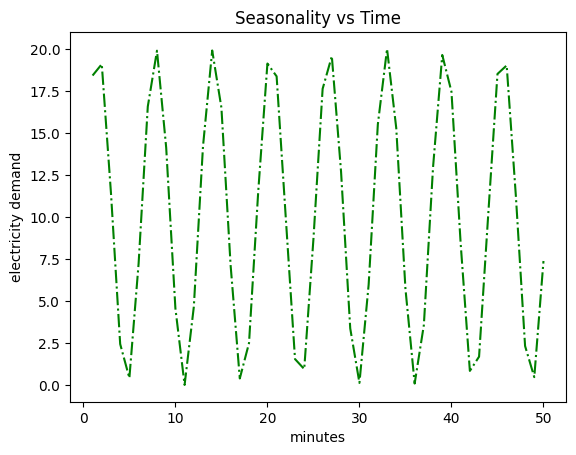

In [ ]:
seasonal = 10 + np.sin(time) * 10
plt.plot(time, seasonal
         , 'g-.')
plt.title("Seasonality vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

3. 잔차 (Residual) 데이터

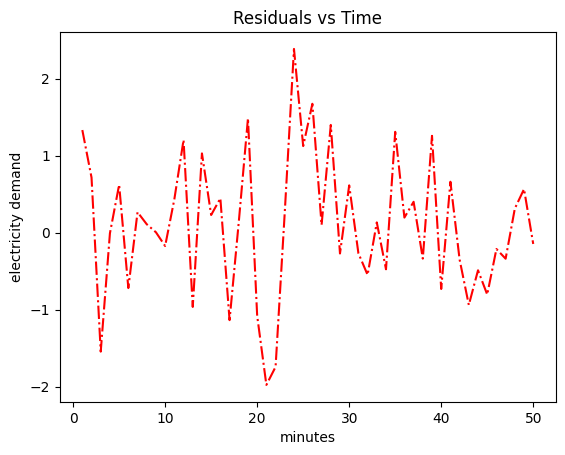

In [4]:
np.random.seed(10)  # reproducible results
residual = np.random.normal(loc=0.0, scale=1, size=len(time))
plt.plot(time, residual, 'r-.')
plt.title("Residuals vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

Section 2. 추세, 계절성, 잔차의 합으로써의 시계열 데이터 $ Q_t = T_t+S_t+R_t$  
$ Q_t $ 는 전체 시계열 데이터  
$ T_t $는 추세 (trend)  
$ S_t $는 계절성 (seasonlity)  
$ R_t $는 추세 (residual) 

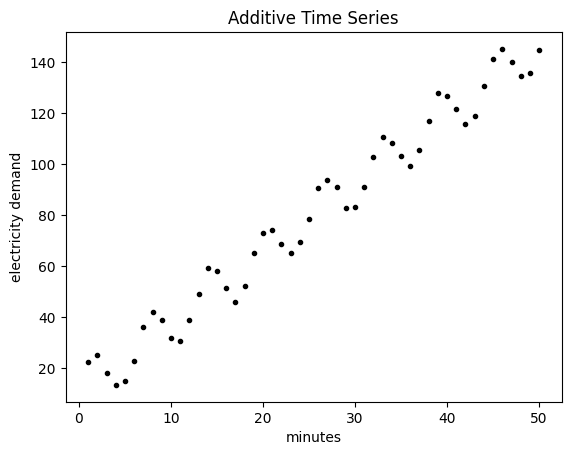

In [5]:
additive = trend + seasonal + residual
plt.plot(time, additive, 'k.')
plt.title("Additive Time Series")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

Multiplicative 시계열 데이터 
$ Q_t = T_t*S_t*R_t$  

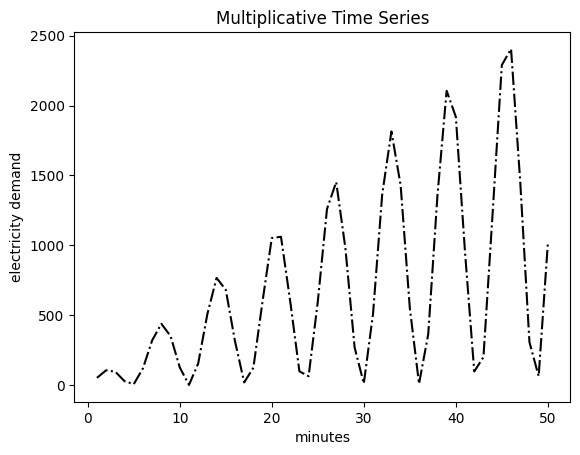

In [6]:
# ignoring residual to make pattern more apparent
ignored_residual = np.ones_like(residual)
multiplicative = trend * seasonal * ignored_residual

plt.plot(time, multiplicative, 'k-.')
plt.title("Multiplicative Time Series")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

Section 3: 시계열 데이터 분해  
Python의 statsmodel 패키지에는 추세, 계절성, 잔차를 분리해주는 함수를 활용하여 분해

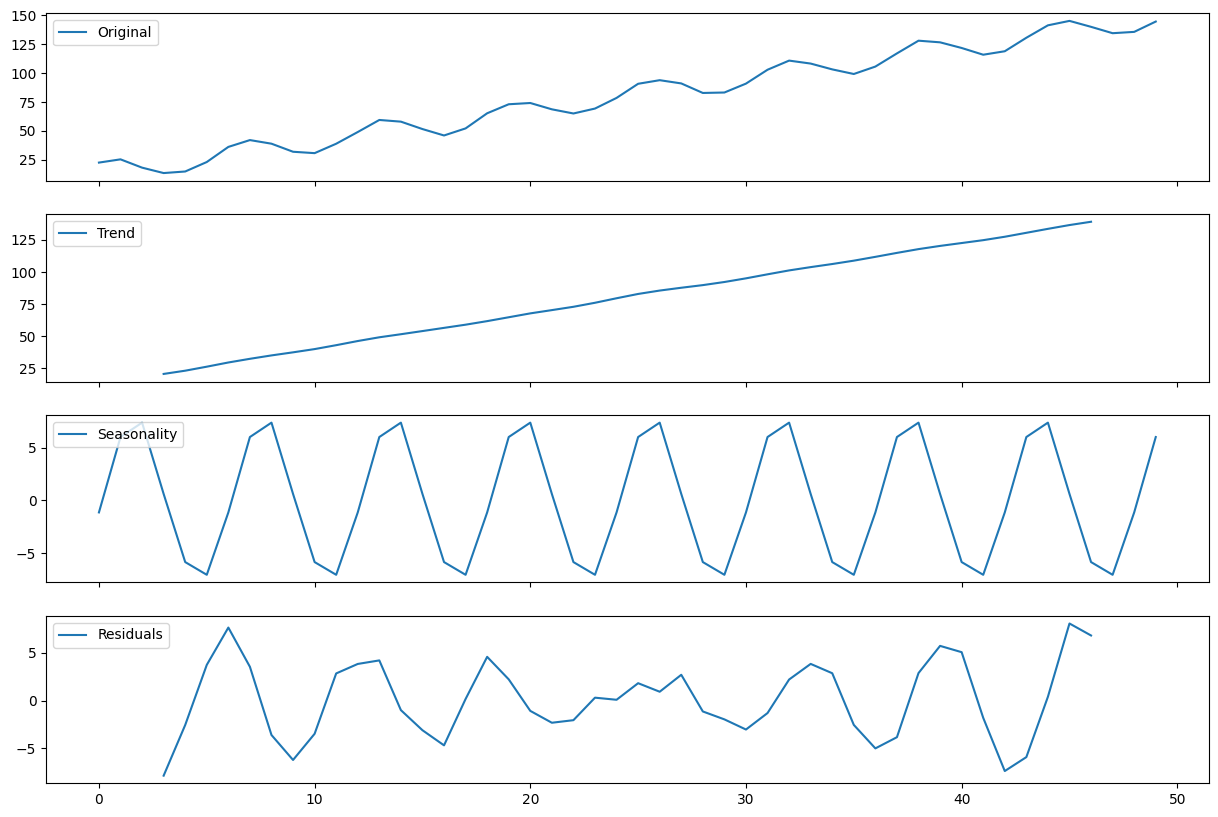

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=additive, model='additive', period=6)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(additive, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality') 
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

실습 #1  
Dataset_A와 Dataset_B를 추세, 계절성, 잔차로 분리하여서 출력해 보시오

In [ ]:
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
# get data
path_to_file = "Data/"

time = np.arange(0, 50)
dataset_A = np.load(path_to_file + "dataset_A.npy")
dataset_B = np.load(path_to_file + "dataset_B.npy")
################################################
###########        실습1-1-시작        ##########
################################################

# Dataset_A plot

# seaonsol_decompose 실행

# Trend, Seasonal, resid (Residual) 출력


# Dataset_B plot

# seaonsol_decompose 실행

# Trend, Seasonal, resid (Residual) 출력






################################################
###########        실습1-2-시작        ##########
################################################


### 정상성(stationarity) 이란?

4가지 특성을 가져야함. 
1. 일정한 평균
2. 일정한 분산
3. 일정한 자가상관 구조
4. 주기성 없음
대표적인 정상성을 가지는 신호는 백색잡음 (White noise) 임.


Text(0.5, 1.0, 'Stationary TS')

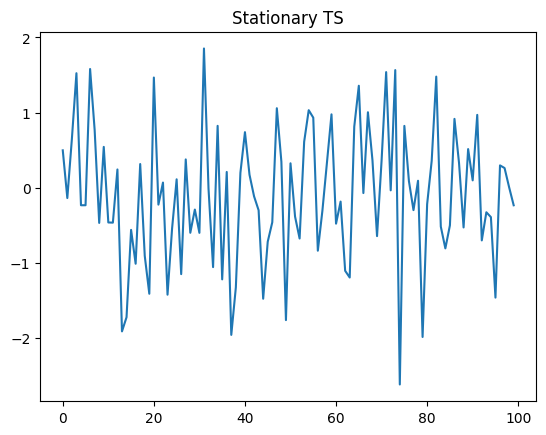

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# reproducibility
np.random.seed(42)

# data
time = np.arange(100)
stationary = np.random.normal(loc=0, scale=1.0, size=len(time))
def simpleplot(x, y, title, xlabel="time", ylabel="series"):
    plt.plot(x, y, 'k-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3);

plt.plot(time, stationary)
plt.title("Stationary TS")


Text(0.5, 1.0, 'Nonstationary Data w/Lagged Structure')

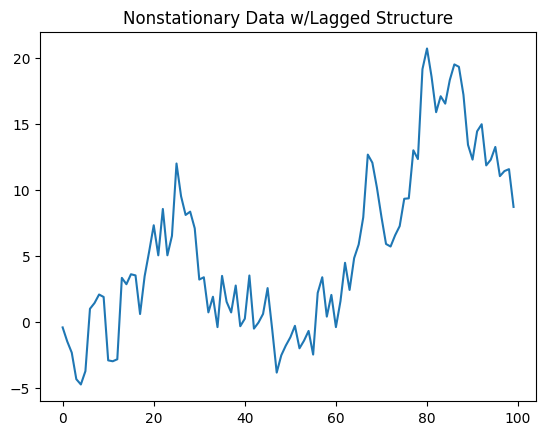

In [12]:
# seed to start series
seed = 3.14
# create autocorrelated data
lagged = np.empty_like(time, dtype='float')
for t in time:
    lagged[t] = seed + np.random.normal(loc=0, scale=2.5, size=1)[0]
    seed = lagged[t]
plt.plot(time, lagged)
plt.title("Nonstationary Data w/Lagged Structure")

### 비정상적인 시계열을 나타내는 특징 들
1. 추세(Trend) (변화하는 평균)
2. 이분산성(Heteroscedasticity) (변화하는 분산)
3. 계절성(Seasonality) (주기적 구성 요소)
4. 추세 + 계절성 (Trend + Seasonality)

### 정상성을 확인하는 방법 또는 알고리즘
1. 부분(Chunk) 영역에 대한 통계치
1. 히스트그램을 통한 데이터 분포 확인
2. Dickey-Fuller test

추세와 계절성을 가지는 비정상성 시계열 데이터 예제

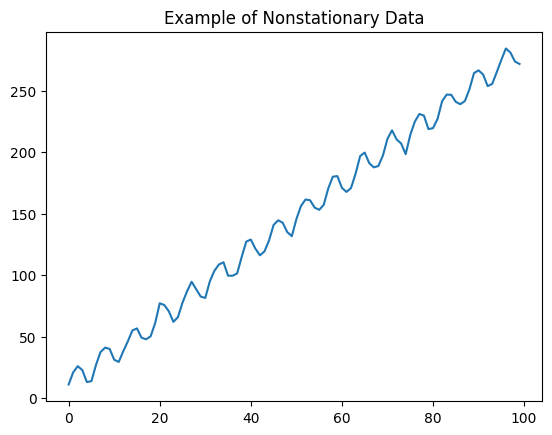

In [13]:
seasonality = 10 + np.sin(time) * 10
trend = (time * 2.75) + stationary

trend_seasonality = trend + seasonality + stationary

plt.plot(time, trend_seasonality)
plt.title("Example of Nonstationary Data")
plt.show()

1. 부분 (Chunk) 영역에 대한 통계치 확인
  - 전체 영역을 분절하고, 각 영역의 평균과 분산을 확인하여 평균이나, 분산이 변하면 비정상성일 가능성이 높음. 

np.split: https://numpy.org/doc/stable/reference/generated/numpy.split.html

In [14]:
# split data into 10 chunks
chunks = np.split(trend, indices_or_sections=10)
# compare means and variances
print("{} | {:7} | {}".format("Chunk", "Mean", "Variance"))
print("-" * 26)
for i, chunk in enumerate(chunks, 1):
    print("{:5} | {:.6} | {:.6}".format(i, np.mean(chunk), np.var(chunk)))

Chunk | Mean    | Variance
--------------------------
    1 | 12.8231 | 62.548
    2 | 39.0843 | 60.8662
    3 | 67.1532 | 58.7456
    4 | 94.5649 | 57.2321
    5 | 122.122 | 58.9505
    6 | 150.074 | 65.1111
    7 | 177.36 | 67.7091
    8 | 204.827 | 54.8101
    9 | 232.476 | 62.6766
   10 | 259.726 | 61.6424


2. 히스트그램을 통한 데이터 분포 확인
  - 데이터가 Normal 분포에 가까우면 정상성일 가능성이 높음.

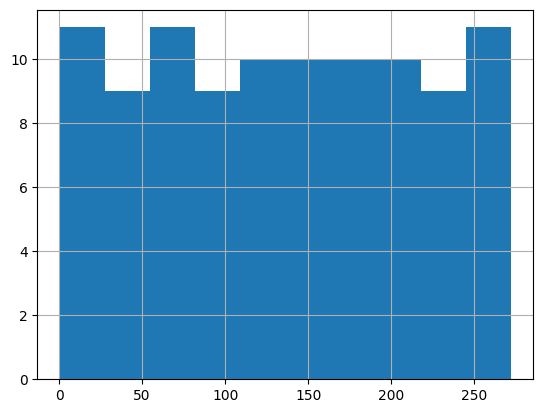

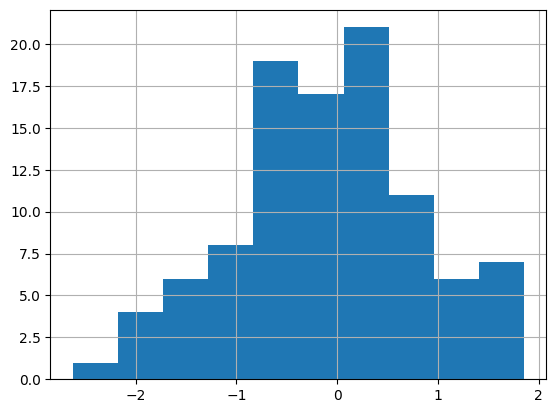

In [17]:
import pandas as pd

pd.Series(trend).hist();
plt.show()
pd.Series(stationary).hist();
plt.show()

3. Augmented Dickey-Fuller Test

Null hypothesis : the series is nonstationary  
Alternative hypothesis: the series is stationary  

p-value가 0.5이하인 경우 귀무가설 기각으로 정상성을 가지는 시계열로 판별할 수 있음.
adfuller: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

In [15]:
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(stationary)
print("p-value of random time series:", pvalue)
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(trend, regression='c')
print("p-value of trend:", pvalue)
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(lagged, regression='c')
print("p-value of autoregressive (lagged):", pvalue)

p-value of random time series: 1.1655044784188918e-17
p-value of trend: 0.9787610787258312
p-value of autoregressive (lagged): 0.33319546838684744


### Section 3: 비정상성에서 정상성 변환 예시

#### 예시1 - statsmodels을 활용한 추세와 계절성 제거

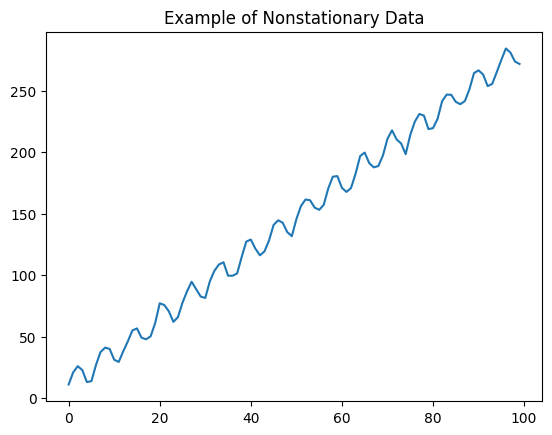

p-value:  0.9770692037868633


In [20]:
plt.plot(time, trend_seasonality)
plt.title("Example of Nonstationary Data")
plt.show()

adf_b4, pvalue_b4, usedlag_, nobs_, critical_values_, icbest_ = adfuller(trend_seasonality)
print("p-value: ", pvalue_b4)

Seasonal_decompose 함수를 통해 비정상성 시계열 데이터 분해

Trend, Seasonal 항은 비정상성을 가지고,
Residual 항만 정상성 시계열 데이터로 볼 수 있음. 

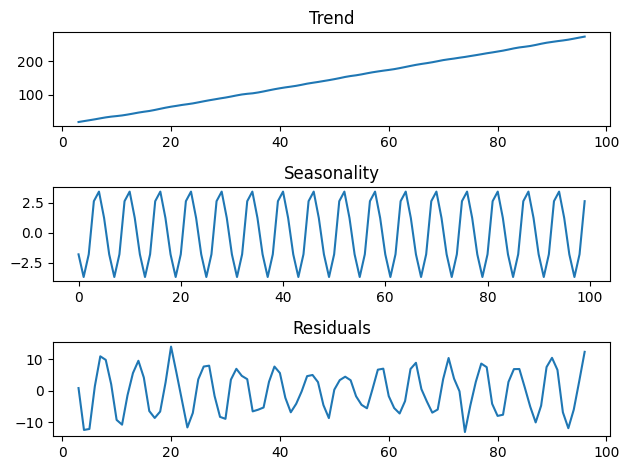

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=trend_seasonality, model='additive', period=6)
est_trend = ss_decomposition.trend
est_seasonal = ss_decomposition.seasonal
est_residual = ss_decomposition.resid
plt.subplot(3,1,1)
plt.plot(time, est_trend)
plt.title("Trend")
plt.subplot(3,1,2)
plt.plot(time, est_seasonal)
plt.title("Seasonality")
plt.subplot(3,1,3)
plt.plot(time, est_residual)
plt.title("Residuals")
plt.tight_layout()
plt.show()

Residual 부분에 Augmented Dickey-Fuller test를 통해 정상성 여부 검사 
Note, seasonal_decompose 함수를 실행하면 양단에 nan데이터가 생기고 이를 제거해 줘야함. 
1. est_residual -> est_residual[3:-3]   
:앞뒤로 3개의 데이터씩 제거, 제거되는 양은 seasonal의 frequency의 절반임)
2. pandas의 dropna 함수 활용

In [18]:
import pandas as pd

print(est_residual)
#1. est_residual -> est_residual[3:-3] 
est_residual_wo_nan = est_residual[3:-3]
#2. pandas의 dropna함수 활용용
df_est_residual = pd.DataFrame(est_residual)
df_est_residual = df_est_residual.dropna()
print(df_est_residual)

adf_after, pvalue_after, usedlag_, nobs_, critical_values_, icbest_ = adfuller(est_residual_wo_nan)
print("p-value: ", pvalue_after)

[         nan          nan          nan   0.8840983  -12.35758556
 -12.04433461   1.48296718  10.92168902   9.79838903   2.1098592
  -9.18549316 -10.68530084  -1.39341901   5.62708429   9.51728139
   4.19733863  -6.37688101  -8.57079082  -6.54120712   2.73466783
  13.99559009   5.66172011  -2.96051089 -11.56383319  -6.98680664
   3.63407228   7.6896628    7.96829354  -1.62794659  -8.22074175
  -8.84730447   3.55066635   6.97315154   4.74605812   3.69790485
  -6.48278186  -5.95820585  -5.25809215   2.87435058   7.68322103
   5.64810713  -2.17356117  -6.77398565  -4.08149483  -0.16197687
   4.65431128   5.02346523   2.76727458  -4.5018214   -8.61021749
   0.383526     3.39920212   4.47636135   3.35785156  -1.70991311
  -4.41005501  -5.51047744   0.45522075   6.69811425   7.02150652
  -1.65724247  -5.43116384  -7.15141958  -3.23759496   6.91315694
   8.8780479    0.56710431  -3.33147621  -6.88311175  -5.88888625
   3.72543884  10.38963663   3.8706296   -0.1327287  -13.00749744
  -4.573024

#### 예시2 - Heteroscedasticity(분산이 변하는 경우) 는 log_transformation 을 통해 비정상성을 정상성 시계열 데이터로 변환함. 
참조, ADF test의 p-value가 0.05 이상이더라도 비정상성의 특성을 가지는 경우가 있음. 


p-value:  2.4990147402545578e-06


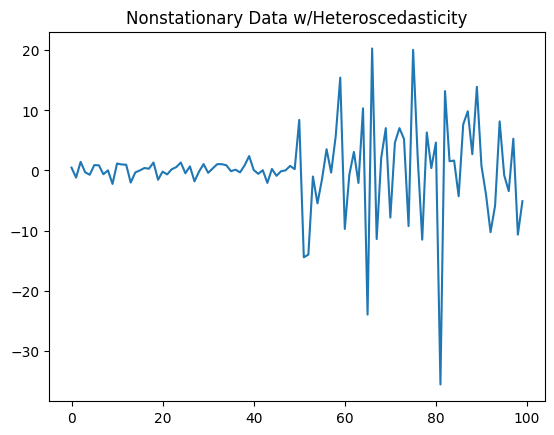

In [19]:
# reproducibility
np.random.seed(1234)

# data
level_1 = np.random.normal(loc=0, scale=1.0, size = 50)
level_2 = np.random.normal(loc=0, scale=10.0, size = 50)
heteroscedasticity = np.append(level_1, level_2)

plt.plot(time, heteroscedasticity)
plt.title("Nonstationary Data w/Heteroscedasticity")

adf_b4, pvalue_b4, usedlag_, nobs_, critical_values_, icbest_ = adfuller(heteroscedasticity)
print("p-value: ", pvalue_b4)


p-value:  3.571455588795977e-22


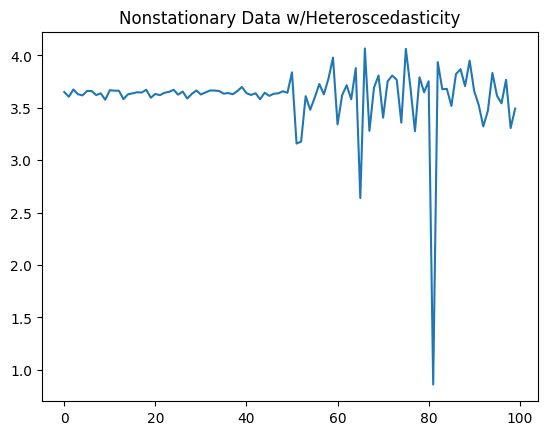

In [21]:
#log transformation을 위해서는 모든 값을 양수로 만들어야함.
new_hetero = heteroscedasticity + 38

log_new_hetero = np.log(new_hetero)

plt.plot(time, log_new_hetero)
plt.title("Nonstationary Data w/Heteroscedasticity")

adf_b4, pvalue_b4, usedlag_, nobs_, critical_values_, icbest_ = adfuller(log_new_hetero)
print("p-value: ", pvalue_b4)

#### 예시 3 - 차분을 통한 자기상관 (Autocorrelation) 제거

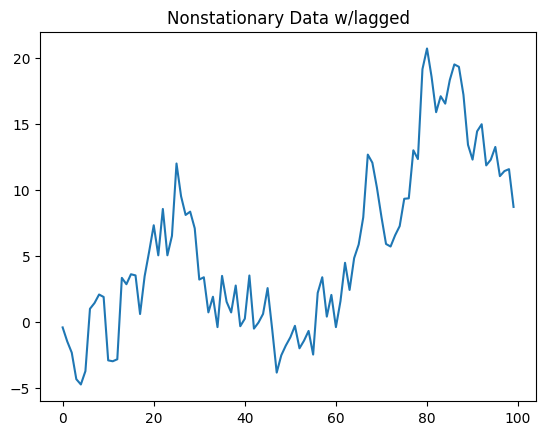

p-value (lagged):  0.33319546838684744


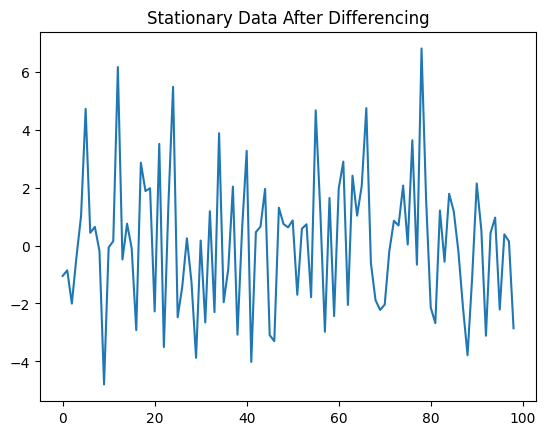

p-value (difference):  1.9196947925176694e-19


In [22]:
plt.plot(time, lagged)
plt.title("Nonstationary Data w/lagged")

difference = lagged[1:] - lagged[:-1]
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(lagged, regression='c')


plt.show()

adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(lagged)
print("p-value (lagged): ", pvalue)

plt.plot(time[:-1], difference)
plt.title("Stationary Data After Differencing")
plt.show()


adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(difference)
print("p-value (difference): ", pvalue)

### 실습: 비행기 탑승객 데이터를 정상성을 갖는 시계열 데이터로 변환하시오  

파일 : /data/airpassengers.csv

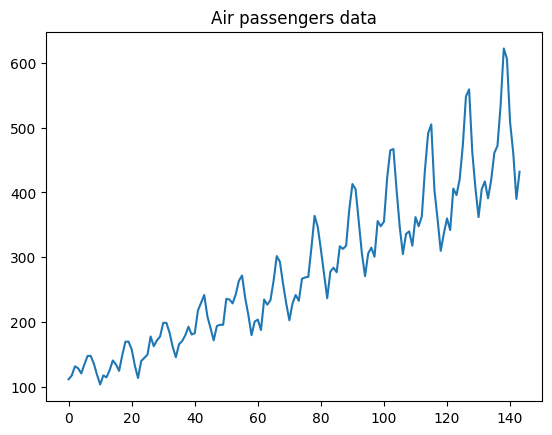

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller #ADF 검정

airpassengers = pd.read_csv('./data/AirPassengers.csv')
data = airpassengers['#Passengers'] #Passengers 부분만 사용용
time = np.arange(len(data))

plt.plot(time, data)
plt.title("Air passengers data")
plt.show()

각 비정상성 경우 별로 정상성 데이터로 변경 방법  
1.분산 변화 -> Log_transformation  
2.추세 -> 차분  
3.계절성 -> 계절 차분  

P-value (original): 0.9918802434376408
0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
139   -0.045934
140    0.012024
141    0.031830
142   -0.050082
143   -0.009964
Name: #Passengers, Length: 144, dtype: float64
13     0.039164
14     0.000361
15    -0.020496
16    -0.012939
17     0.066148
         ...   
139   -0.045934
140    0.012024
141    0.031830
142   -0.050082
143   -0.009964
Name: #Passengers, Length: 131, dtype: float64


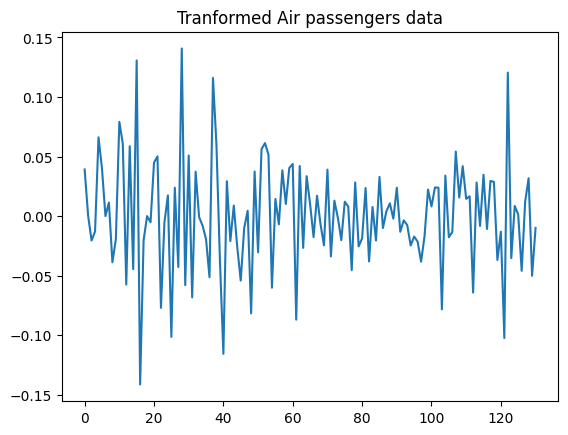

P-value (transformed):
0.0002485912311384133


In [ ]:
################################################
###########        실습2-1-시작        ##########
################################################


# adfuller test를 통해서 정상성 확인



# 분산 변화 -> log_transformation



# 추세 -> 차분



# 계절성 -> 계절 차분



# 차분으로 인해 생긴 데이터의 nan 값 제거



# adfuller test를 통해서 정상성 확인

################################################
###########        실습2-2-시작        ##########
################################################

랜덤 워크 (Random walk) : 확률 변수를 매 회 추가로 Noise를 더해주는 것  

$ S_t = X_1+X_2+X_3+...+X_t,    t= 1,2,3, ... $



Random p-value: 0.5341887124972027
The series is not stationary
Residual p-value: 1.54424461096825e-17
The series is stationary.


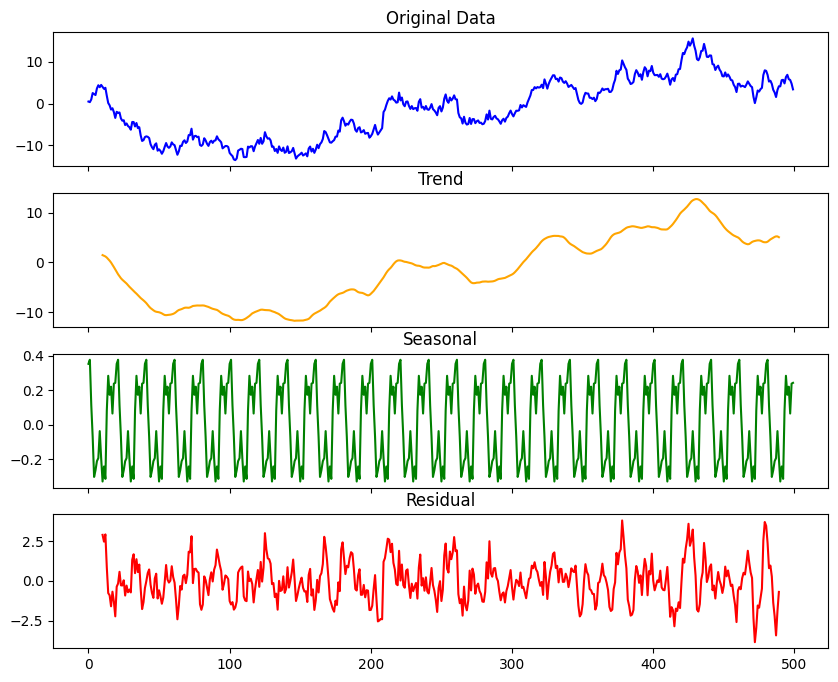

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Random walk 데이터 생성
def generate_random_walk(n):
    np.random.seed(42)  # 재현성을 위해 고정
    steps = np.random.normal(loc=0, scale=1, size=n)
    random_walk = np.cumsum(steps)
    return random_walk

random_walk = generate_random_walk(500) # 데이터 생성
decomposition = seasonal_decompose(random_walk, model="additive", period=20) # 시계열 분해 (additive)


# Augmented Dickey-Fuller Test (ADF Test) for Stationarity
adf_test = adfuller(random_walk)
print("Random p-value:", adf_test[1])
print("The series is stationary.") if adf_test[1] < 0.05 else print("The series is not stationary")
# Residual의 stationarity 평가
adf_test = adfuller(decomposition.resid[10:-10])
print("Residual p-value:", adf_test[1])
print("The series is stationary.") if adf_test[1] < 0.05 else print("The series is not stationary")

# 분해 결과 시각화
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
axes[0].plot(random_walk, label="Original", color="blue")
axes[0].set_title("Original Data")
axes[1].plot(decomposition.trend, label="Trend", color="orange")
axes[1].set_title("Trend")
axes[2].plot(decomposition.seasonal, label="Seasonal", color="green")
axes[2].set_title("Seasonal")
axes[3].plot(decomposition.resid, label="Residual", color="red")
axes[3].set_title("Residual")
plt.show()


### ARIMA model 기반 예측 모델 구현  

#### ARIMA 계수(p, d, q) 설정: ACF & PACF 활용법 
1️⃣ 차분(d) 결정 (데이터 정상화)  
ADF(Augmented Dickey-Fuller) 테스트로 정상성 여부 확인  
비정상 데이터 → 차분(d) 증가 (d는 데이터를 정상화하는 데 필요한 차분 횟수)  
p-value < 0.05일 때 정상성 확보 → d 값 결정  

2️⃣ 자기회귀 차수(p) 설정 (PACF 활용)  
PACF 그래프에서 특정 시차 이후 신뢰구간(보통 95%) 안으로 급격히 들어오는 첫 번째 lag을 p로 설정  
PACF가 급격히 감소하는 마지막 시차 = AR(p) 모델 차수  

3️⃣ 이동 평균 차수(q) 설정 (ACF 활용)  
ACF 그래프에서 특정 시차 이후 신뢰구간 안으로 들어오는 첫 번째 lag을 q로 설정  
ACF가 급격히 감소하는 마지막 시차 = MA(q) 모델 차수  


plot_acf: https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html
plot_pacf: https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_pacf.html
numpy.cumsum: https://numpy.org/doc/2.1/reference/generated/numpy.cumsum.html

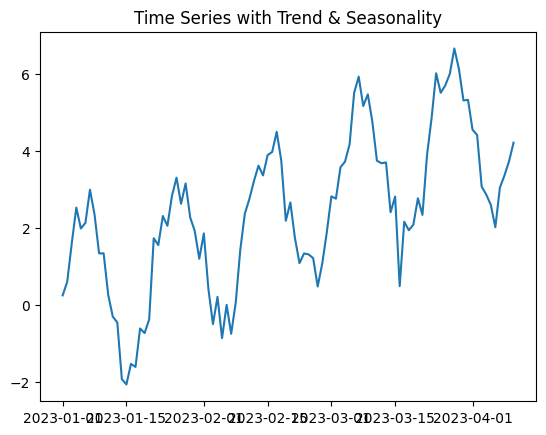

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# 1. 시계열 데이터 생성 (랜덤 + 추세 + 계절성)
np.random.seed(42)
time = np.arange(100)
trend = 0.05 * time  # 선형 추세
seasonality = 2 * np.sin(2 * np.pi * time / 20)  # 주기 20의 계절성
noise = np.random.normal(scale=0.5, size=100)  # 랜덤 노이즈
data = trend + seasonality + noise  # 최종 데이터

# 2. 시계열 데이터 프레임 생성
df = pd.DataFrame({'Value': data}, index=pd.date_range(start='2023-01-01', periods=100, freq='D'))

plt.plot(df['Value'])
plt.title('Time Series with Trend & Seasonality')
plt.show()



p-value for adfuller test: 0.9271196177057557
p-value of diff. for adfuller test: 2.86949359231856e-12


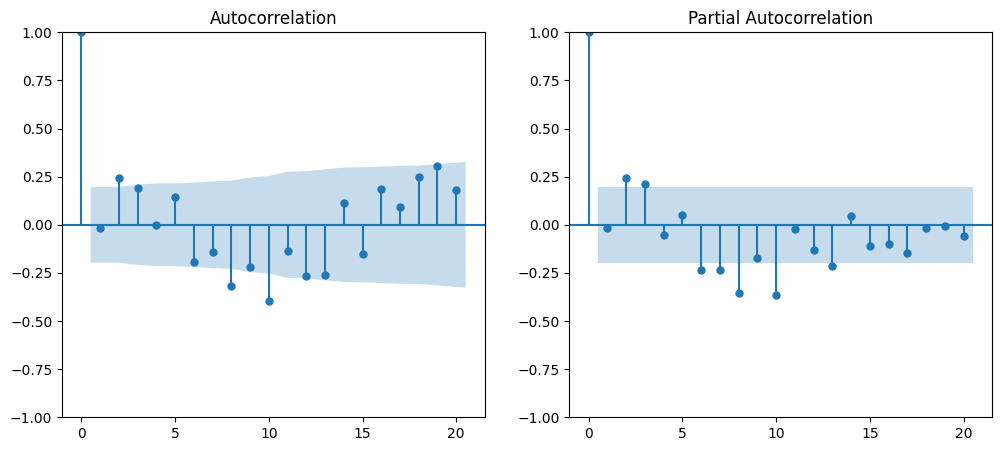

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


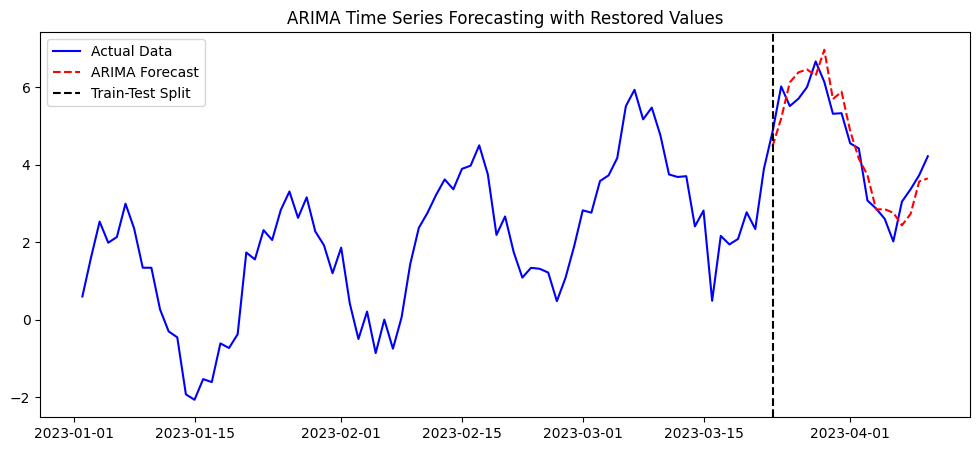

In [2]:
# 3. ADF 테스트로 정상성 확인
adf_test = adfuller(df['Value'])
print("p-value for adfuller test:", adf_test[1])
if adf_test[1] > 0.05:
    df['Value'] = df['Value'].diff()
    adf_test = adfuller(df['Value'].dropna())
    print("p-value of diff. for adfuller test:", adf_test[1])
    df.dropna(inplace=True)

# 4. ACF와 PACF 플롯을 활용하여 p, q 값 찾기
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(df['Value'], ax=ax[0])
plot_pacf(df['Value'], ax=ax[1])
plt.show()

# 5. 신뢰구간 안으로 들어오는 시점 확인 후 p, q 설정
p = 11  # PACF 신뢰구간 안으로 들어가기 전 마지막 lag
q = 11  # ACF 신뢰구간 안으로 들어가기 전 마지막 lag
d = 1  # 차분 횟수

# 6. ARIMA 모델 훈련
train_size = 80  # 훈련 데이터 크기
train, test = df['Value'][:train_size], df['Value'][train_size:]

# ARIMA 모델 학습
darima_model = ARIMA(train, order=(p, d, q))
arima_result = darima_model.fit()

# 7. 예측 (테스트 데이터 크기만큼 예측)
forecast = arima_result.forecast(steps=len(test))

# 8. 원래 형태로 복원 (차분 되돌리기)
forecast_restored = forecast.cumsum() + data[train_size]
df['Value_Restored'] = df['Value'].cumsum() + data[0] # 원래 데이터 복원

# 9. 원래 데이터와 예측 데이터 시각화
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Value_Restored'], label='Actual Data', color='blue')
plt.plot(df.index[train_size:], forecast_restored, label='ARIMA Forecast', color='red', linestyle='dashed')
plt.axvline(df.index[train_size], color='black', linestyle='--', label='Train-Test Split')
plt.legend()
plt.title('ARIMA Time Series Forecasting with Restored Values')
plt.show()



실습 3. ARIMA 모델을 활용해서 미래 데이터를 예측하는 예제

In [ ]:
# 1. 시계열 데이터 생성 (랜덤 + 추세 + 계절성)
np.random.seed(42)
time = np.arange(100)
trend = 0.05 * time  # 선형 추세
seasonality = 2 * np.sin(2 * np.pi * time / 20)  # 주기 20의 계절성
noise = np.random.normal(scale=0.5, size=100)  # 랜덤 노이즈
data = trend + seasonality + noise  # 최종 데이터

################################################
###########        실습3-1-시작        ##########
################################################
#input : data (trend, seaonality, noise를 모두 가지고 있는 시계열 데이터)

# 1. 시계열 데이터 출력 



# 2. ADF 테스트로 정상성 확인


# 3. 비정상성 데이터로 확인 된다면 시계열 데이터의 차분을 구해 다시 ADF 테스트 진행


# 4. ACF와 PACF 플롯을 활용하여 p, q 값 찾기



# 5. 신뢰구간 안으로 들어오는 시점 확인 후 p, q 설정


# 6. ARIMA 모델 훈련 (전체 데이터 학습)



# 7. 예측 (향후 데이터 예측)



# 8. 원래 형태로 복원 (차분 되돌리기)




# 9. 원래 데이터와 미래 예측 데이터 시각화

